In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
# import helper
import matplotlib.pyplot as plt


import IPython.display as ipd
import seaborn as sns

import warnings
import os
os.chdir("D:/DataIncubator_ChestXray/")
warnings.filterwarnings('ignore')

from torch import nn, optim
from torchvision import transforms, models, datasets

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [2]:
pwd

'D:\\DataIncubator_ChestXray'

In [3]:
data_dir = 'D:/DataIncubator_ChestXray/chest_xray'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'
test_dir = data_dir + '/test'
model_save_path = 'D:/DataIncubator_ChestXray/model_output'

In [5]:
batch_size = 8

In [4]:
train_transforms = transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
                                        transforms.RandomRotation(degrees=15),
                                        transforms.ColorJitter(),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.CenterCrop(size=224),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                             [0.229, 0.224, 0.225])])

val_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [6]:
trainset = datasets.ImageFolder(train_dir,transform=train_transforms)
validset = datasets.ImageFolder(valid_dir,transform=val_transforms)
testset = datasets.ImageFolder(test_dir,transform=test_transforms)

In [7]:
testset

Dataset ImageFolder
    Number of datapoints: 624
    Root Location: D:/DataIncubator_ChestXray/chest_xray/test
    Transforms (if any): Compose(
                             Resize(size=256, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 8 is out of bounds for axis 0 with size 8

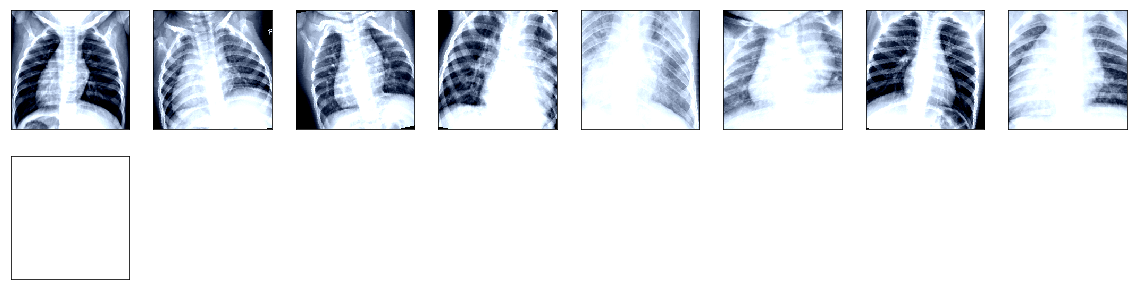

In [9]:
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1,2,0)));
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(20,5))

for idx in np.arange(9):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[]);
    imshow(images[idx]);
print(labels)

In [10]:
trainiter = iter(trainloader)
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([8, 3, 224, 224]), torch.Size([8]))

In [11]:
torch.cuda.is_available()

True

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [13]:
model = models.resnet101(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\shanu/.torch\models\resnet101-5d3b4d8f.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 178728960/178728960 [03:33<00:00, 837713.89it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

)


In [14]:
for param in model.parameters():
    param.requires_grad = False

In [15]:
classifier = nn.Sequential(nn.Linear(2048, 512),
                           nn.ReLU(),
                          nn.Dropout(p=0.5),
                          nn.Linear(512, 2),
                          nn.LogSoftmax(dim=1))
model.fc = classifier
criterion = nn.NLLLoss()

In [16]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

43,550,274 total parameters.
1,050,114 training parameters.


In [17]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

)


In [18]:
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model = model.to(device)

In [113]:
def train(epoch):
    model.train()
    correct_train = 0
#     history_train = []
    train_loss = 0
    train_acc = 0
    
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        
        # zero the gradient, forward, backward and running pytorch rhythm
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.data[0]
        # get the label of prediction
        pred = torch.max(output.data, 1)[1]
        correct_train += pred.eq(target.data.view_as(pred)).cpu().sum()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\n'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.data[0]))
    
    train_loss /= len(trainloader.dataset)
    train_acc = 100. * correct_train / len(trainloader.dataset)
    print("train accuracy {}".format(train_acc))
    print('\nTrain Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct_train, len(trainloader.dataset), 100. * correct_train / len(trainloader.dataset)))
#     history_train.append([train_loss, train_acc])
    
#     history_train_df = pd.DataFrame(history_train, columns=['train_loss', 'train_acc'])
    return train_loss, train_acc
            

In [114]:
def valid():
    model.eval()
    val_loss = 0
    correct = 0

    for data, target in validloader:
        data, target = data.to(device), target.to(device)
        
        # output from model
        output = model(data)
        
        # sum total loss
        val_loss += criterion(output, target).data[0]
        
        # get the label of prediction
        pred = torch.max(output.data, 1)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    val_loss /= len(validloader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validloader.dataset),
        100. * correct / len(validloader.dataset)))

In [115]:
def test():
    model.eval()
    test_loss = 0
    test_acc = 0
    correct = 0
    history_test = []

    for data, target in testloader:
        data, target = data.to(device), target.to(device)
        
        # output from model
        output = model(data)
        
        # sum total loss
        test_loss += criterion(output, target).data[0]
        
        # get the label of prediction
        pred = torch.max(output.data, 1)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(testloader.dataset)
    test_acc = 100. * correct / len(testloader.dataset)
    print("test accuracy {}".format(test_acc))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))
    
#     history_test.append([test_loss, test_acc])
    
#     history_test_df = history_test_df.append(pd.DataFrame(history_test, index=['test_loss', 'test_acc']), ignore_index=True)
    return test_loss, test_acc

In [116]:
history = []
for epoch in range(1, 11):
    train_loss, train_acc = train(epoch)
    
    test_loss, test_acc = test()
    
    history.append([train_loss, train_acc, test_loss, test_acc])

Train Epoch: 1 [0/5216 (0%)]	Loss: 0.656369

Train Epoch: 1 [80/5216 (2%)]	Loss: 0.204889

Train Epoch: 1 [160/5216 (3%)]	Loss: 3.722829

Train Epoch: 1 [240/5216 (5%)]	Loss: 0.693039

Train Epoch: 1 [320/5216 (6%)]	Loss: 0.078861

Train Epoch: 1 [400/5216 (8%)]	Loss: 0.079341

Train Epoch: 1 [480/5216 (9%)]	Loss: 0.077958

Train Epoch: 1 [560/5216 (11%)]	Loss: 9.073562

Train Epoch: 1 [640/5216 (12%)]	Loss: 0.647160

Train Epoch: 1 [720/5216 (14%)]	Loss: 0.468935

Train Epoch: 1 [800/5216 (15%)]	Loss: 0.495507

Train Epoch: 1 [880/5216 (17%)]	Loss: 0.104806

Train Epoch: 1 [960/5216 (18%)]	Loss: 0.189411

Train Epoch: 1 [1040/5216 (20%)]	Loss: 0.378217

Train Epoch: 1 [1120/5216 (21%)]	Loss: 0.663421

Train Epoch: 1 [1200/5216 (23%)]	Loss: 0.402771

Train Epoch: 1 [1280/5216 (25%)]	Loss: 0.147216

Train Epoch: 1 [1360/5216 (26%)]	Loss: 0.910836

Train Epoch: 1 [1440/5216 (28%)]	Loss: 0.220095

Train Epoch: 1 [1520/5216 (29%)]	Loss: 0.997618

Train Epoch: 1 [1600/5216 (31%)]	Loss: 0.12


Train Epoch: 3 [2560/5216 (49%)]	Loss: 0.166535

Train Epoch: 3 [2640/5216 (51%)]	Loss: 0.153648

Train Epoch: 3 [2720/5216 (52%)]	Loss: 0.154056

Train Epoch: 3 [2800/5216 (54%)]	Loss: 0.089416

Train Epoch: 3 [2880/5216 (55%)]	Loss: 0.062120

Train Epoch: 3 [2960/5216 (57%)]	Loss: 0.128056

Train Epoch: 3 [3040/5216 (58%)]	Loss: 0.137621

Train Epoch: 3 [3120/5216 (60%)]	Loss: 0.384966

Train Epoch: 3 [3200/5216 (61%)]	Loss: 0.550877

Train Epoch: 3 [3280/5216 (63%)]	Loss: 0.150909

Train Epoch: 3 [3360/5216 (64%)]	Loss: 0.330063

Train Epoch: 3 [3440/5216 (66%)]	Loss: 0.070985

Train Epoch: 3 [3520/5216 (67%)]	Loss: 0.437282

Train Epoch: 3 [3600/5216 (69%)]	Loss: 0.112640

Train Epoch: 3 [3680/5216 (71%)]	Loss: 0.187220

Train Epoch: 3 [3760/5216 (72%)]	Loss: 0.313820

Train Epoch: 3 [3840/5216 (74%)]	Loss: 0.178558

Train Epoch: 3 [3920/5216 (75%)]	Loss: 0.273511

Train Epoch: 3 [4000/5216 (77%)]	Loss: 0.049364

Train Epoch: 3 [4080/5216 (78%)]	Loss: 0.207121

Train Epoch: 3 [416


Train Epoch: 5 [5040/5216 (97%)]	Loss: 0.111860

Train Epoch: 5 [5120/5216 (98%)]	Loss: 0.092897

Train Epoch: 5 [5200/5216 (100%)]	Loss: 0.562673

train accuracy 87

Train Accuracy: 4588/5216 (87%)

test accuracy 83

Test set: Average loss: 0.0549, Accuracy: 519/624 (83%)

Train Epoch: 6 [0/5216 (0%)]	Loss: 0.129841

Train Epoch: 6 [80/5216 (2%)]	Loss: 0.486725

Train Epoch: 6 [160/5216 (3%)]	Loss: 0.281543

Train Epoch: 6 [240/5216 (5%)]	Loss: 0.047897

Train Epoch: 6 [320/5216 (6%)]	Loss: 0.263878

Train Epoch: 6 [400/5216 (8%)]	Loss: 0.390344

Train Epoch: 6 [480/5216 (9%)]	Loss: 0.022256

Train Epoch: 6 [560/5216 (11%)]	Loss: 0.128991

Train Epoch: 6 [640/5216 (12%)]	Loss: 0.238523

Train Epoch: 6 [720/5216 (14%)]	Loss: 0.322400

Train Epoch: 6 [800/5216 (15%)]	Loss: 0.546821

Train Epoch: 6 [880/5216 (17%)]	Loss: 0.246309

Train Epoch: 6 [960/5216 (18%)]	Loss: 0.256516

Train Epoch: 6 [1040/5216 (20%)]	Loss: 0.247657

Train Epoch: 6 [1120/5216 (21%)]	Loss: 0.193494

Train Epoch:


Train Epoch: 8 [2080/5216 (40%)]	Loss: 0.148726

Train Epoch: 8 [2160/5216 (41%)]	Loss: 0.144335

Train Epoch: 8 [2240/5216 (43%)]	Loss: 0.168807

Train Epoch: 8 [2320/5216 (44%)]	Loss: 0.043865

Train Epoch: 8 [2400/5216 (46%)]	Loss: 0.246801

Train Epoch: 8 [2480/5216 (48%)]	Loss: 0.095957

Train Epoch: 8 [2560/5216 (49%)]	Loss: 0.112790

Train Epoch: 8 [2640/5216 (51%)]	Loss: 0.021525

Train Epoch: 8 [2720/5216 (52%)]	Loss: 0.162581

Train Epoch: 8 [2800/5216 (54%)]	Loss: 0.138684

Train Epoch: 8 [2880/5216 (55%)]	Loss: 0.035080

Train Epoch: 8 [2960/5216 (57%)]	Loss: 0.280687

Train Epoch: 8 [3040/5216 (58%)]	Loss: 0.153687

Train Epoch: 8 [3120/5216 (60%)]	Loss: 0.423841

Train Epoch: 8 [3200/5216 (61%)]	Loss: 0.156982

Train Epoch: 8 [3280/5216 (63%)]	Loss: 0.066692

Train Epoch: 8 [3360/5216 (64%)]	Loss: 0.206267

Train Epoch: 8 [3440/5216 (66%)]	Loss: 0.567715

Train Epoch: 8 [3520/5216 (67%)]	Loss: 0.595376

Train Epoch: 8 [3600/5216 (69%)]	Loss: 0.409219

Train Epoch: 8 [368


Train Epoch: 10 [4480/5216 (86%)]	Loss: 0.222601

Train Epoch: 10 [4560/5216 (87%)]	Loss: 0.179897

Train Epoch: 10 [4640/5216 (89%)]	Loss: 0.386236

Train Epoch: 10 [4720/5216 (90%)]	Loss: 0.329670

Train Epoch: 10 [4800/5216 (92%)]	Loss: 0.152078

Train Epoch: 10 [4880/5216 (94%)]	Loss: 0.444878

Train Epoch: 10 [4960/5216 (95%)]	Loss: 0.155379

Train Epoch: 10 [5040/5216 (97%)]	Loss: 0.079294

Train Epoch: 10 [5120/5216 (98%)]	Loss: 0.267078

Train Epoch: 10 [5200/5216 (100%)]	Loss: 0.106437

train accuracy 90

Train Accuracy: 4707/5216 (90%)

test accuracy 83

Test set: Average loss: 0.0810, Accuracy: 520/624 (83%)



In [117]:
history

[[tensor(0.0530, device='cuda:0'),
  tensor(84),
  tensor(0.0781, device='cuda:0'),
  tensor(76)],
 [tensor(0.0358, device='cuda:0'),
  tensor(87),
  tensor(0.0578, device='cuda:0'),
  tensor(81)],
 [tensor(0.0356, device='cuda:0'),
  tensor(88),
  tensor(0.0701, device='cuda:0'),
  tensor(77)],
 [tensor(0.0343, device='cuda:0'),
  tensor(89),
  tensor(0.0799, device='cuda:0'),
  tensor(79)],
 [tensor(0.0345, device='cuda:0'),
  tensor(87),
  tensor(0.0549, device='cuda:0'),
  tensor(83)],
 [tensor(0.0331, device='cuda:0'),
  tensor(88),
  tensor(0.1018, device='cuda:0'),
  tensor(78)],
 [tensor(0.0332, device='cuda:0'),
  tensor(88),
  tensor(0.0619, device='cuda:0'),
  tensor(85)],
 [tensor(0.0322, device='cuda:0'),
  tensor(89),
  tensor(0.0606, device='cuda:0'),
  tensor(86)],
 [tensor(0.0330, device='cuda:0'),
  tensor(89),
  tensor(0.0674, device='cuda:0'),
  tensor(84)],
 [tensor(0.0306, device='cuda:0'),
  tensor(90),
  tensor(0.0810, device='cuda:0'),
  tensor(83)]]

In [118]:
history_transformed = []
for i in range(len(history)):
    history_transformed.append([x.tolist() for x in history[i]])


In [124]:
history_df = pd.DataFrame(history_transformed, columns=["train_loss", "train_acc", "test_loss", "test_acc"])

In [126]:
history_df["epoch"] = [x for x in range(1, 11)]

In [127]:
history_df

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.052968,84,0.078093,76,1
1,0.035784,87,0.057815,81,2
2,0.035638,88,0.070138,77,3
3,0.034281,89,0.079895,79,4
4,0.034503,87,0.054890,83,5
5,0.033108,88,0.101823,78,6
6,0.033209,88,0.061885,85,7
7,0.032233,89,0.060604,86,8
8,0.033047,89,0.067378,84,9
9,0.030627,90,0.081021,83,10


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

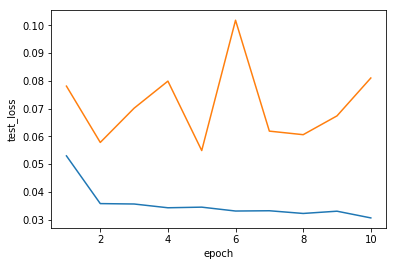

In [130]:
sns.lineplot(x='epoch', y='train_loss', data=history_df)
sns.lineplot(x='epoch', y='test_loss', data=history_df)
# plt.xticks()

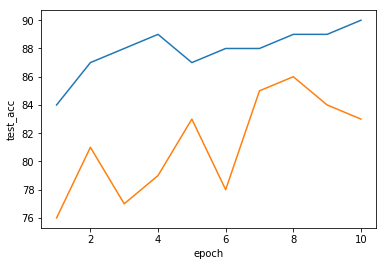

In [131]:
sns.lineplot(x='epoch', y='train_acc', data=history_df)
sns.lineplot(x='epoch', y='test_acc', data=history_df)

In [132]:
torch.save(model, model_save_path + '/ResNet50_Freeze.pth')

In [133]:
for param in model.parameters():
    param.requires_grad = True

In [134]:
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)

In [135]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

24,558,146 total parameters.
24,558,146 training parameters.


In [136]:
model = model.to(device)

In [137]:
history_unfreeze = []
for epoch in range(1, 5):
    train_loss, train_acc = train(epoch)
    
    test_loss, test_acc = test()
    
    history_unfreeze.append([train_loss, train_acc, test_loss, test_acc])

Train Epoch: 1 [0/5216 (0%)]	Loss: 0.135068

Train Epoch: 1 [80/5216 (2%)]	Loss: 0.397936

Train Epoch: 1 [160/5216 (3%)]	Loss: 0.209141

Train Epoch: 1 [240/5216 (5%)]	Loss: 0.154917

Train Epoch: 1 [320/5216 (6%)]	Loss: 0.180275

Train Epoch: 1 [400/5216 (8%)]	Loss: 0.110298

Train Epoch: 1 [480/5216 (9%)]	Loss: 0.272699

Train Epoch: 1 [560/5216 (11%)]	Loss: 0.115618

Train Epoch: 1 [640/5216 (12%)]	Loss: 0.240481

Train Epoch: 1 [720/5216 (14%)]	Loss: 1.500997

Train Epoch: 1 [800/5216 (15%)]	Loss: 0.222383

Train Epoch: 1 [880/5216 (17%)]	Loss: 0.048444

Train Epoch: 1 [960/5216 (18%)]	Loss: 0.226584

Train Epoch: 1 [1040/5216 (20%)]	Loss: 0.168328

Train Epoch: 1 [1120/5216 (21%)]	Loss: 0.377249

Train Epoch: 1 [1200/5216 (23%)]	Loss: 0.274783

Train Epoch: 1 [1280/5216 (25%)]	Loss: 0.136562

Train Epoch: 1 [1360/5216 (26%)]	Loss: 0.044877

Train Epoch: 1 [1440/5216 (28%)]	Loss: 0.388623

Train Epoch: 1 [1520/5216 (29%)]	Loss: 0.559513

Train Epoch: 1 [1600/5216 (31%)]	Loss: 0.11


Train Epoch: 3 [2560/5216 (49%)]	Loss: 0.242078

Train Epoch: 3 [2640/5216 (51%)]	Loss: 0.532640

Train Epoch: 3 [2720/5216 (52%)]	Loss: 0.728778

Train Epoch: 3 [2800/5216 (54%)]	Loss: 0.316364

Train Epoch: 3 [2880/5216 (55%)]	Loss: 0.323159

Train Epoch: 3 [2960/5216 (57%)]	Loss: 0.104167

Train Epoch: 3 [3040/5216 (58%)]	Loss: 0.077866

Train Epoch: 3 [3120/5216 (60%)]	Loss: 0.093868

Train Epoch: 3 [3200/5216 (61%)]	Loss: 0.107451

Train Epoch: 3 [3280/5216 (63%)]	Loss: 0.259274

Train Epoch: 3 [3360/5216 (64%)]	Loss: 0.215623

Train Epoch: 3 [3440/5216 (66%)]	Loss: 0.205626

Train Epoch: 3 [3520/5216 (67%)]	Loss: 0.138682

Train Epoch: 3 [3600/5216 (69%)]	Loss: 0.157737

Train Epoch: 3 [3680/5216 (71%)]	Loss: 0.190452

Train Epoch: 3 [3760/5216 (72%)]	Loss: 0.087063

Train Epoch: 3 [3840/5216 (74%)]	Loss: 0.292425

Train Epoch: 3 [3920/5216 (75%)]	Loss: 0.234232

Train Epoch: 3 [4000/5216 (77%)]	Loss: 0.205753

Train Epoch: 3 [4080/5216 (78%)]	Loss: 0.585936

Train Epoch: 3 [416

In [139]:
history_transformed_unfrz = []
for i in range(len(history_unfreeze)):
    history_transformed_unfrz.append([x.tolist() for x in history_unfreeze[i]])


In [140]:
history_df_unfrz = pd.DataFrame(history_transformed_unfrz, columns=["train_loss", "train_acc", "test_loss", "test_acc"])

In [147]:
history_df_unfrz["epoch"] = [x for x in range(11, 15)]

In [148]:
history_df_unfrz

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.031561,90,0.112803,80,11
1,0.028408,91,0.086334,83,12
2,0.029807,89,0.128915,78,13
3,0.031598,89,0.082101,83,14


In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

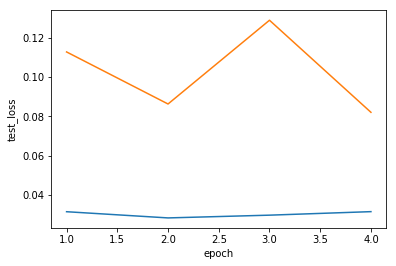

In [144]:
sns.lineplot(x='epoch', y='train_loss', data=history_df_unfrz)
sns.lineplot(x='epoch', y='test_loss', data=history_df_unfrz)
# plt.xticks()

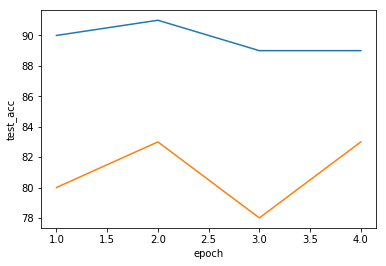

In [145]:
sns.lineplot(x='epoch', y='train_acc', data=history_df_unfrz)
sns.lineplot(x='epoch', y='test_acc', data=history_df_unfrz)

In [146]:
torch.save(model, model_save_path + '/ResNet50_UnFreeze.pth')

In [149]:
history_total = pd.concat([history_df, history_df_unfrz])

In [150]:
history_total

,train_loss,train_acc,test_loss,test_acc,epoch
0,0.052968,84,0.078093,76,1
1,0.035784,87,0.057815,81,2
2,0.035638,88,0.070138,77,3
3,0.034281,89,0.079895,79,4
4,0.034503,87,0.054890,83,5
5,0.033108,88,0.101823,78,6
6,0.033209,88,0.061885,85,7
7,0.032233,89,0.060604,86,8
8,0.033047,89,0.067378,84,9
9,0.030627,90,0.081021,83,10


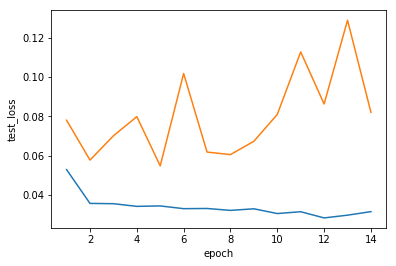

In [152]:
sns.lineplot(x='epoch', y='train_loss', data=history_total)
sns.lineplot(x='epoch', y='test_loss', data=history_total)

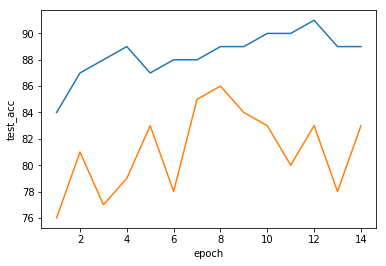

In [151]:
sns.lineplot(x='epoch', y='train_acc', data=history_total)
sns.lineplot(x='epoch', y='test_acc', data=history_total)